In [47]:
from qiskit import *
import math as m
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import Initialize
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex


# The Qubit
The most general formula for a single qubit, $|\psi\rangle = \alpha|0\rangle +\beta|1\rangle$. $\alpha$ and $\beta$ are referred to as probability amplitudes meaning that they satisfy the following, $|\alpha|^2 + |\beta|^2 = 1$. 

Physically, this means that when $|\psi\rangle$ is measured in the $\{|0\rangle, \;|1\rangle\}$ basis, 
* 0 is measured with a probability of $|\alpha|^2$
* 1 is measured with a probability of $|\beta|^2$.

## The Bloch Sphere
The bloch vector allows us to parametrize a qubit via two real numbers, $|\psi\rangle = cos(\frac{\theta}{2})|0\rangle + e^{i\phi}sin(\frac{\theta}{2})|1\rangle$, where  $0\leq\theta\leq\pi/2$  is the angle made with the z-axis and  $0\leq\phi\leq2\pi$  is the angle made with the x-axis.

In the following cell, adjust the values of $\theta$ and $\phi$ to see the qubit on the bloch sphere.

<IPython.core.display.Latex object>

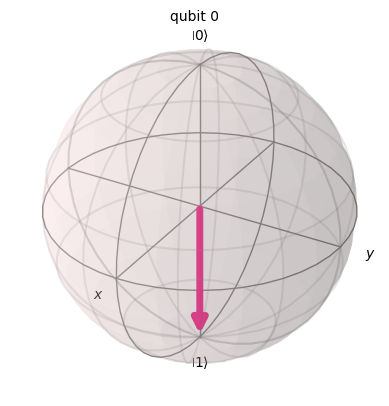

In [63]:
# Plots bloch vector given theta and phi
def plot_bloch(theta, phi):
    a = m.cos(theta/2)
    b = (m.cos(phi) +complex(0,1)*m.sin(phi))*m.sin(theta/2)
    psi = [a,b]
    state = Statevector(psi)
    display(array_to_latex(state, prefix="|\\psi\\rangle ="))
    return plot_bloch_multivector(state)

plot_bloch(m.pi,0)

# Qubit as a Vector

As seen above, a qubit can be viewed as a 2-element complex column vector where the entries are the probability amplitudes, $|\psi\rangle = \alpha|0\rangle +\beta|1\rangle = \begin{bmatrix} \alpha \\ \beta \end{bmatrix}$. 

Note that this is in the $\{|0\rangle, \;|1\rangle\}$ basis. 

Another commonly used basis is the $\{|+\rangle, \;|-\rangle\}$ basis where 
* $|+\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle$ , ($\theta = \pi/2$ and $\phi = \pi/2$)
* $|-\rangle = \frac{1}{\sqrt{2}}|0\rangle -\frac{1}{\sqrt{2}}|1\rangle$ , ($\theta = \pi/2$ and $\phi = -\pi/2$)

Below we can see that these are the poles of the x-axis on the block sphere.

<IPython.core.display.Latex object>

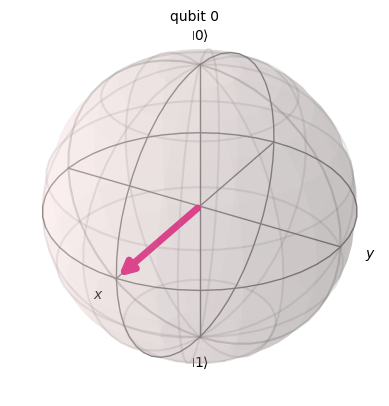

In [64]:
# + state
plot_bloch(m.pi/2,0)

<IPython.core.display.Latex object>

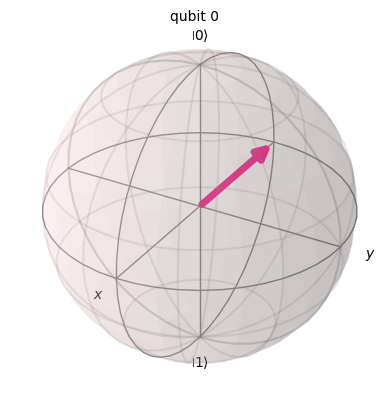

In [61]:
#- state
plot_bloch(m.pi/2,m.pi)

## Quantum Gates 

Qubits evolve via Quantum Gates, i.e. 2x2 matrices. Some single qubit gates often encountered are shown below in the $\{|0\rangle, \;|1\rangle\}$ basis:

X = $\begin{bmatrix}   
 0 & 1 \\        
 1 & 0           
\end{bmatrix}$ Bit-Flip or NOT gate

Y = $\begin{bmatrix}   
 0 & -i \\        
 i & 0           
\end{bmatrix}$ Bit/Phase-Flip 

Z = $\begin{bmatrix}   
 1 & 0 \\        
 0 & -1           
\end{bmatrix}$ Phase-Flip   

H = $ \frac{1}{\sqrt{2}}\begin{bmatrix}   
 1 & 1 \\        
 1 & -1           
\end{bmatrix}$ Hadamard Gate (takes $|0\rangle$ to $|+\rangle$, $|1\rangle$ to $|-\rangle$, and vice versa)

The first 3 gates are known as the "Pauli Matrices" and have many significant properties. Below are known as the "Rotation Operator Gates" which rotate a state about the indicated axis on the bloch sphere.

$R_x$ = $\begin{bmatrix}   
 cos(\theta/2) & -i\;sin(\theta/2) \\        
 -i\;sin(\theta/2) & cos(\theta/2)           
\end{bmatrix}$ 

$R_y$ = $\begin{bmatrix}   
 cos(\theta/2) & -sin(\theta/2) \\        
 sin(\theta/2) & cos(\theta/2)           
\end{bmatrix}$ 

$R_z$ = $\begin{bmatrix}   
 e^{-i\;\theta/2} & 0 \\        
 0 &   e^{i\;\theta/2}         
\end{bmatrix}$ 

Lets take a look at how some of these gates evolve a the $|0\rangle$ state

# Multi-Qubit Systems

Classically, a bit only takes the value 0 or 1 whereas above, we saw that a qubit is a linear combination the 0 and 1 states. Similarly, when we expand to 2 qubits, we can completely describe the combined state as a linearly combination of the 00, 01, 10, and 11 states.

$|\psi\rangle = \alpha|00\rangle +\beta|01\rangle +\gamma|10\rangle +\delta|11\rangle $ where  $|\alpha|^2 + |\beta|^2 + |\gamma|^2 + |\delta|^2 = 1$,

and

 $|00\rangle =\begin{bmatrix} 1\\0\\0\\0 \end{bmatrix}  $,  $|01\rangle =\begin{bmatrix} 0\\1\\0\\0 \end{bmatrix}  $,  $|10\rangle =\begin{bmatrix} 0\\0\\1\\0 \end{bmatrix}  $,  $|11\rangle =\begin{bmatrix} 0\\0\\0\\1 \end{bmatrix}  $

One can think of the classical n-bit strings becoming basis vectors for the n-qubit quantum system.

Seeing as states become 4-dim vectors, their evolution is dictated by 4x4 matrices.

**Important note**: In most of the literature, a multi-qubit state is denoted via Big Endian convention as $|q_0q_1...q_{(n-1)}\rangle$ whereas qiskit uses the Little Endian convention, $|q_{(n-1)}q_1...q_0\rangle$



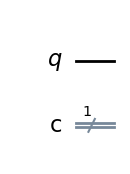

In [37]:
q = QuantumRegister(1, name = 'q')
c = ClassicalRegister(1, name = 'c')

circuit = QuantumCircuit(q,c)

circuit.draw('mpl')

<IPython.core.display.Latex object>

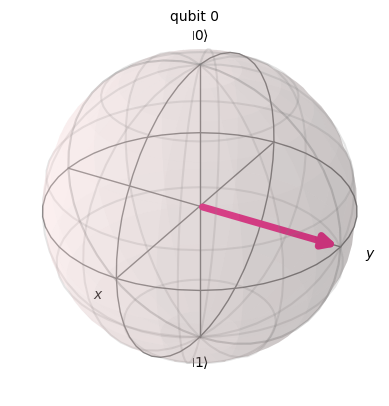

In [46]:
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import Initialize
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex

state = Statevector(psi)
plot_bloch_multivector(state)
display(array_to_latex(state, prefix="|\\psi\\rangle ="))
plot_bloch_multivector(state)